In [2]:
import numpy as np
from numpy import matlib as ml
import pandas as pd
import os
import warnings
import librosa
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from random import shuffle
import scipy.stats as st

from pynwb import NWBHDF5IO

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec

# import pydtmc

import pdb
warnings.filterwarnings('ignore')

In [22]:
# ----- LOAD DATA -----
data = pd.read_csv('all_annotations.csv')

# ----- FIGURES -----
outp = os.path.join('figures','2025February')

In [5]:
data.head()

,Unnamed: 0,id,start_time,stop_time,behavior,duration,atype,pair_tag,sex,GT,color,assay,pair_num
0,0,1,0.001,0.498,No interaction,0.497,STATE,Pair15,F,Het,[245. 201. 39.],aggression,1
1,1,2,0.499,3.555,Investigate,3.056,STATE,Pair15,F,Het,[245. 201. 39.],aggression,1
2,2,3,3.556,5.411,Sniff,1.855,STATE,Pair15,F,Het,[245. 201. 39.],aggression,1
3,3,4,5.412,5.976,No interaction,0.564,STATE,Pair15,F,Het,[245. 201. 39.],aggression,1
4,4,5,5.977,7.720,Sniff,1.743,STATE,Pair15,F,Het,[245. 201. 39.],aggression,1


In [7]:
# ----- SET UP COLORS -----
acols = [[0.627451,   0.57254905, 0.37254903],
        [0.9607843,  0.7882353,  0.15294118],
        [0.34901962, 0.35686275, 0.49019608],
        [0.24705882, 0.30588236, 0.9607843 ]]

fcols = acols[0:2]
mcols = acols[2:]

fpal = sns.color_palette(fcols)
mpal = sns.color_palette(mcols)
apal = sns.color_palette(acols)

# set hue order
ho = ['WT','Het']

Text(0.5, 1.0, 'Huddle duration, males')

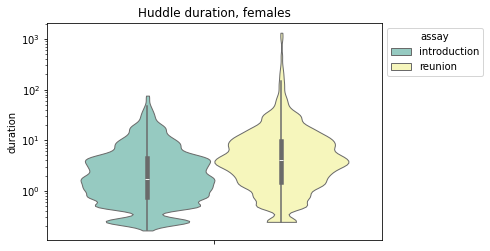

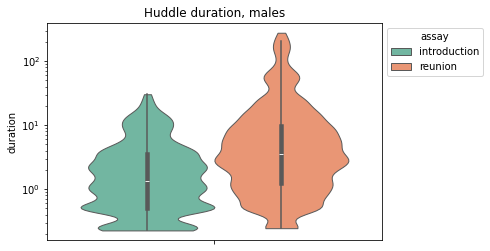

In [8]:
# ----- COMPARE HUDDLE LENGTH POPULATIONS FROM INTRO AND REUNION -----

sexes = ['F','M']
GT = 'WT'
assays=['introduction','reunion']
behavior = 'Huddle'
usestat = 'duration'

allfilt = data.loc[(data['sex'].isin(sexes)) & (data['assay'].isin(assays)) & (data['behavior']==behavior) & (data['GT']==GT)]
#allfilt.duration[allfilt.duration==0] += 0.001
allfilt = allfilt[allfilt.duration>0.1]

# females
f = plt.figure()
ax = sns.violinplot(data=allfilt[allfilt.sex=='F'], y=usestat, bw_adjust=0.5, cut=0, linewidth=1, palette='Set3',hue='assay',
              log_scale = (None,10),density_norm='count')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title('Huddle duration, females')

g = plt.figure()
ax = sns.violinplot(data=allfilt[allfilt.sex=='M'], y='duration', bw_adjust=0.5, cut=0, linewidth=1, palette='Set2',hue='assay',
              log_scale = (None,10),density_norm='count')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title('Huddle duration, males')

Text(0.5, 1.0, 'Median huddle duration, males')

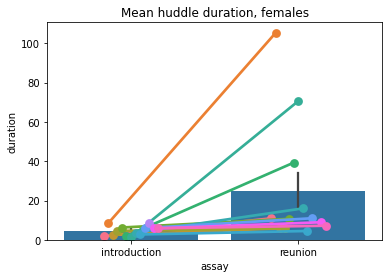

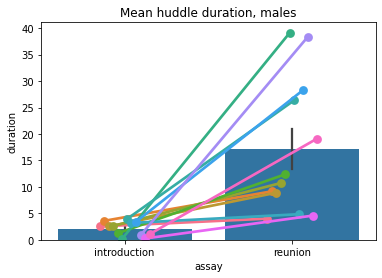

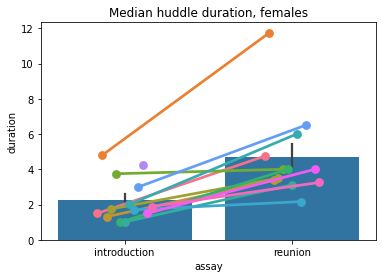

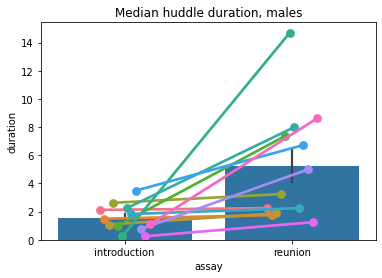

In [5]:
# ----- CALCULATE MEAN DURATION PER INDIVIDUAL -----

allmeans = allfilt.groupby(['pair_tag','sex','assay'])[['duration']].mean().reset_index()
allmeds = allfilt.groupby(['pair_tag','sex','assay'])[['duration']].median().reset_index()

# plot female means
f = plt.figure()
ax = sns.barplot(data=allmeans[allmeans.sex=='F'], x="assay", y="duration", errorbar="se")
sns.pointplot(data=allmeans[allmeans.sex=='F'], x="assay", y="duration", hue="pair_tag", dodge=True,ax=ax)
ax.get_legend().remove()
ax.set_title('Mean huddle duration, females')

# plot male means
g = plt.figure()
ax = sns.barplot(data=allmeans[allmeans.sex=='M'], x="assay", y="duration", errorbar="se")
sns.pointplot(data=allmeans[allmeans.sex=='M'], x="assay", y="duration", hue="pair_tag", dodge=True,ax=ax)
ax.get_legend().remove()
ax.set_title('Mean huddle duration, males')

# plot female medians
h = plt.figure()
ax = sns.barplot(data=allmeds[allmeds.sex=='F'], x="assay", y="duration", errorbar="se")
sns.pointplot(data=allmeds[allmeds.sex=='F'], x="assay", y="duration", hue="pair_tag", dodge=True,ax=ax)
ax.get_legend().remove()
ax.set_title('Median huddle duration, females')

# plot male means
i = plt.figure()
ax = sns.barplot(data=allmeds[allmeds.sex=='M'], x="assay", y="duration", errorbar="se")
sns.pointplot(data=allmeds[allmeds.sex=='M'], x="assay", y="duration", hue="pair_tag", dodge=True,ax=ax)
ax.get_legend().remove()
ax.set_title('Median huddle duration, males')

Text(0.5, 1.0, 'Huddle duration, reunion, females')

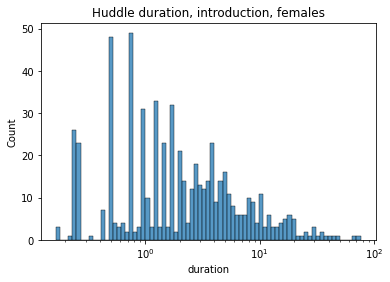

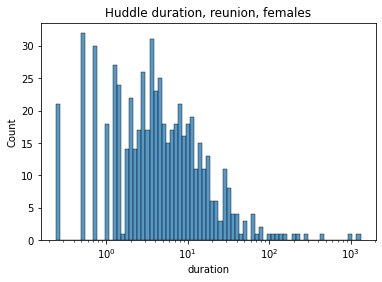

In [6]:
# ----- PLOT DURATION DISTRIBUTIONS IN BAR HISTOGRAMS ------

# female intro
a = plt.figure()
fint = allfilt.loc[(allfilt['sex']=='F') & (allfilt['assay']=='introduction')]
sns.histplot(data=fint,x='duration',bins=75,log_scale=(10,False))
plt.title('Huddle duration, introduction, females')

# female reunion
b = plt.figure()
freu = allfilt.loc[(allfilt['sex']=='F') & (allfilt['assay']=='reunion')]
sns.histplot(data=freu,x='duration',bins=75,log_scale=(10,False))
plt.title('Huddle duration, reunion, females')

Text(0.5, 0.98, 'Huddle duration, females')

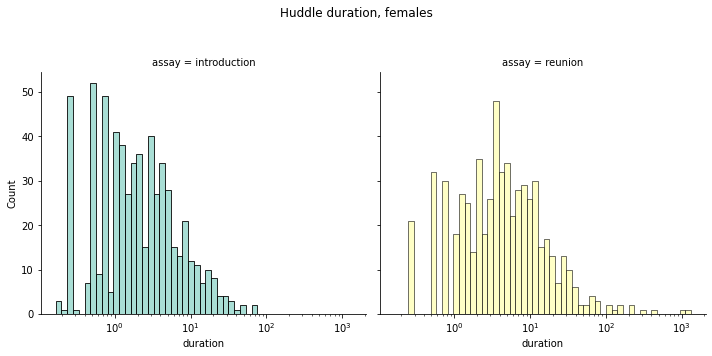

In [23]:
bw = 0.075

x = sns.FacetGrid(allfilt[allfilt.sex=='F'],col='assay',hue='assay',palette='Set3',height=5)
x.map_dataframe(sns.histplot,x='duration',binwidth=bw,log_scale=(10,False))
x.fig.subplots_adjust(top=.8)
x.fig.suptitle('Huddle duration, females')

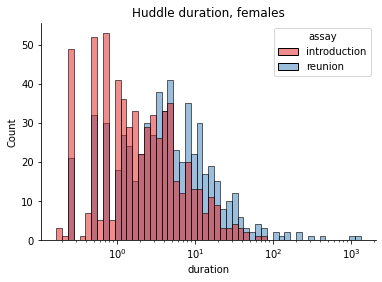

In [23]:
# ----- GENERATE OVERLAY OF HISTOGRAMS -----
sex = 'F'
bw = 0.075

udat = allfilt[allfilt.sex==sex]

x = sns.histplot(data=udat,x='duration',hue='assay',binwidth = bw,log_scale=(10,False),palette='Set1')
plt.title('Huddle duration, females')
sns.despine(top=True,right=True)
plt.savefig(os.path.join(outp,'duration_hist_females.pdf'))

Text(0.5, 0.98, 'Huddle duration, males')

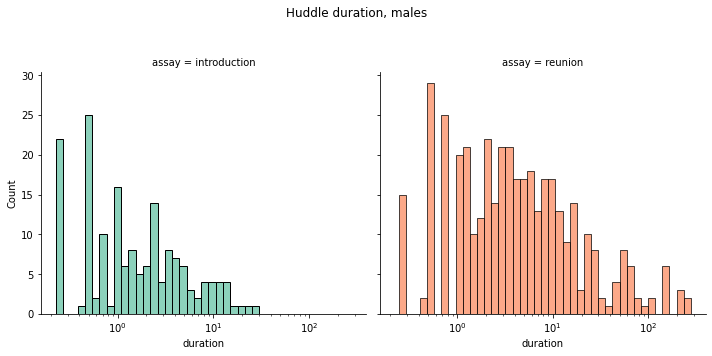

In [24]:
y = sns.FacetGrid(allfilt[allfilt.sex=='M'],col='assay',hue='assay',palette='Set2',height=5)
y.map_dataframe(sns.histplot,x='duration',binwidth=bw,log_scale=(10,False))
y.fig.subplots_adjust(top=.8)
y.fig.suptitle('Huddle duration, males')

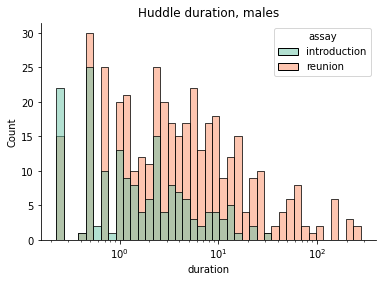

In [24]:
# ----- GENERATE OVERLAY OF HISTOGRAMS -----
sex = 'M'
bw = 0.075

udat = allfilt[allfilt.sex==sex]

x = sns.histplot(data=udat,x='duration',hue='assay',binwidth = bw,log_scale=(10,False),palette='Set2')
plt.title('Huddle duration, males')
sns.despine(top=True,right=True)
plt.savefig(os.path.join(outp,'duration_hist_males.pdf'))

Text(0.5, 0.98, 'Huddle duration')

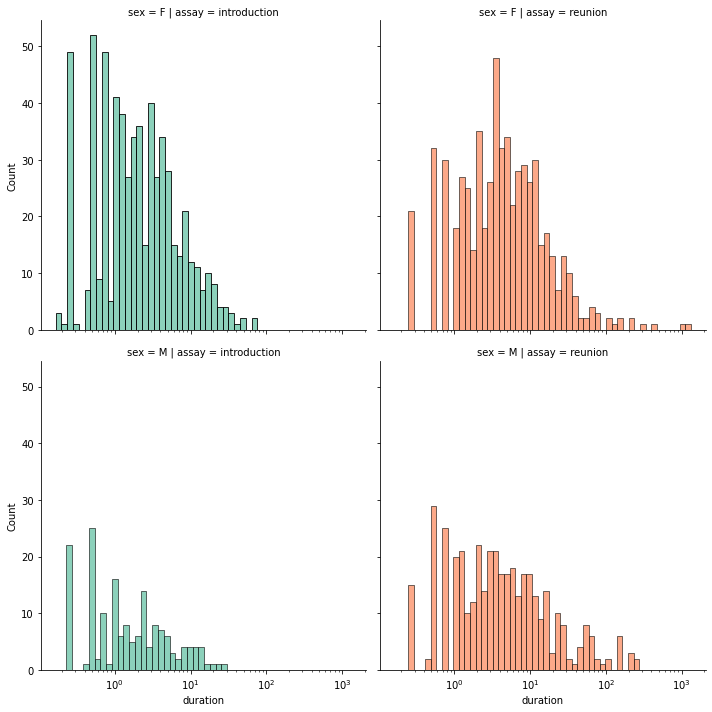

In [25]:
z = sns.FacetGrid(allfilt,col='assay',row='sex',hue='assay',palette='Set2',height=5)
z.map_dataframe(sns.histplot,x='duration',binwidth=bw,log_scale=(10,False))
x.fig.subplots_adjust(top=.8)
x.fig.suptitle('Huddle duration')

Text(0.5, 1.0, 'Huddle counts, males')

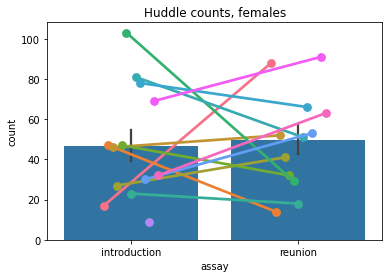

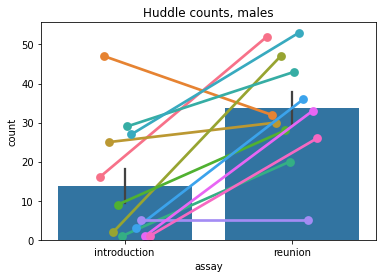

In [10]:
# ----- CALCULATE NUMBERS -----
allcounts = allfilt.groupby(['pair_tag','sex','assay'])[['duration']].count().reset_index()
allcounts = allcounts.rename(columns={'duration': 'count'})

# plot female counts
f = plt.figure()
ax = sns.barplot(data=allcounts[allcounts.sex=='F'], x="assay", y="count", errorbar="se")
sns.pointplot(data=allcounts[allcounts.sex=='F'], x="assay", y="count", hue="pair_tag", dodge=True,ax=ax)
ax.get_legend().remove()
ax.set_title('Huddle counts, females')

# plot male counts
f = plt.figure()
ax = sns.barplot(data=allcounts[allcounts.sex=='M'], x="assay", y="count", errorbar="se")
sns.pointplot(data=allcounts[allcounts.sex=='M'], x="assay", y="count", hue="pair_tag", dodge=True,ax=ax)
ax.get_legend().remove()
ax.set_title('Huddle counts, males')

Text(0.5, 1.0, 'Huddle max duration, males')

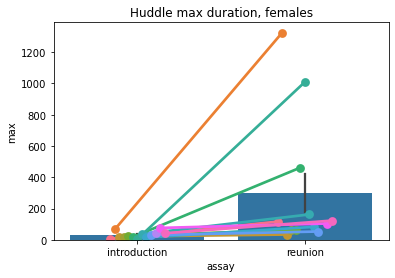

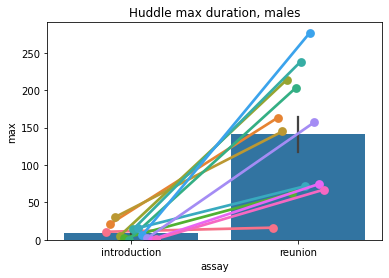

In [11]:
# ----- CALCULATE AND PLOT MAX HUDDLE LENGTH PER INDIVIDUAL -----
allmaxes = allfilt.groupby(['pair_tag','sex','assay'])[['duration']].max().reset_index()
allmaxes = allmaxes.rename(columns={'duration': 'max'})

# plot female counts
f = plt.figure()
ax = sns.barplot(data=allmaxes[allmaxes.sex=='F'], x="assay", y="max", errorbar="se")
sns.pointplot(data=allmaxes[allmaxes.sex=='F'], x="assay", y="max", hue="pair_tag", dodge=True,ax=ax)
ax.get_legend().remove()
ax.set_title('Huddle max duration, females')

# plot male counts
f = plt.figure()
ax = sns.barplot(data=allmaxes[allmaxes.sex=='M'], x="assay", y="max", errorbar="se")
sns.pointplot(data=allmaxes[allmaxes.sex=='M'], x="assay", y="max", hue="pair_tag", dodge=True,ax=ax)
ax.get_legend().remove()
ax.set_title('Huddle max duration, males')

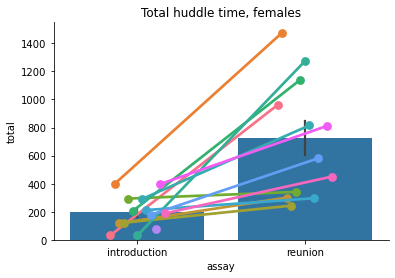

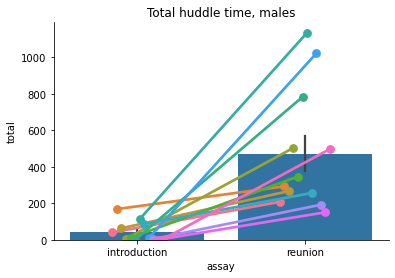

In [25]:
# ----- CALCULATE AND PLOT TOTAL HUDDLE TIME PER INDIVIDUAL -----

alltotals = allfilt.groupby(['pair_tag','sex','assay'])[['duration']].sum().reset_index()
alltotals = alltotals.rename(columns={'duration': 'total'})

# plot female counts
f = plt.figure()
ax = sns.barplot(data=alltotals[alltotals.sex=='F'], x="assay", y="total", errorbar="se")
sns.pointplot(data=alltotals[alltotals.sex=='F'], x="assay", y="total", hue="pair_tag", dodge=True,ax=ax)
ax.get_legend().remove()
ax.set_title('Total huddle time, females')
sns.despine(top=True,right=True)
plt.savefig(os.path.join(outp,'total-time_by-pair_females.pdf'))

# plot male counts
f = plt.figure()
ax = sns.barplot(data=alltotals[alltotals.sex=='M'], x="assay", y="total", errorbar="se")
sns.pointplot(data=alltotals[alltotals.sex=='M'], x="assay", y="total", hue="pair_tag", dodge=True,ax=ax)
ax.get_legend().remove()
ax.set_title('Total huddle time, males')
sns.despine(top=True,right=True)
plt.savefig(os.path.join(outp,'total-time_by-pair_males.pdf'))

Text(0, 0.5, 'huddle duration (s)')

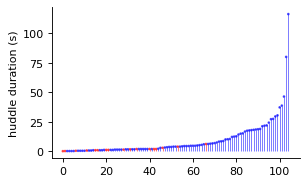

In [15]:
# ----- PROTOTYPE RANK PLOTS -----

testdf = allfilt[allfilt.pair_tag=='Pair16']
testdf.sort_values('duration', inplace=True)
testdf.reset_index(inplace=True)
testdf.color = 'r'
testdf.color[testdf.assay=='reunion']='b'

fig, ax = plt.subplots(figsize=(4,2.5), dpi= 80,frameon=False)
ax.vlines(x=testdf.index, ymin=0, ymax=testdf.duration, color=testdf.color, alpha=0.6, linewidth=0.75)
ax.scatter(x=testdf.index, y=testdf.duration, s=2, color=testdf.color, alpha=0.6)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('huddle duration (s)')

Text(0.5, 0.98, 'Ranked huddle durations, females')

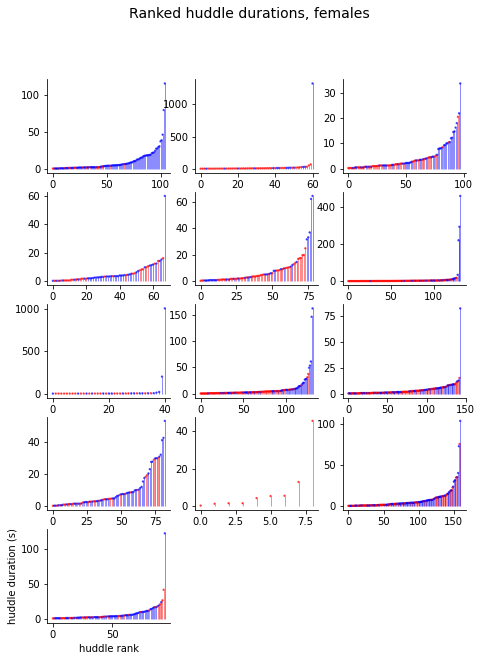

In [16]:
# ----- PUT ORDERED HUDDLE DURATION PLOTS INTO SUBPLOTS PER PAIR, FEMALES -----

fdat = allfilt[allfilt.sex=='F']
nfpairs = len(np.unique(fdat.pair_tag))
nc = 3
nr = int(np.ceil(nfpairs/nc))
fig, axs = plt.subplots(figsize=(7.5,10),nrows=nr,ncols=nc)

for i,ptag in enumerate(np.unique(fdat.pair_tag)):
    thisdat = fdat[fdat.pair_tag==ptag]
    
    testdf = thisdat[thisdat.pair_tag==ptag]
    testdf.sort_values('duration', inplace=True)
    testdf.reset_index(inplace=True)
    testdf.color = 'r'
    testdf.color[testdf.assay=='reunion']='b'
    
    ax = axs[int(np.floor(i/nc)),i%nc]
    ax.vlines(x=testdf.index, ymin=0, ymax=testdf.duration, color=testdf.color, alpha=0.6, linewidth=0.75)
    ax.scatter(x=testdf.index, y=testdf.duration, s=2, color=testdf.color, alpha=0.6)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if i==len(np.unique(fdat.pair_tag))-1:
        ax.set_ylabel('huddle duration (s)')
        ax.set_xlabel('huddle rank')
        
axs[4,1].axis('off')
axs[4,2].axis('off')

fig.suptitle('Ranked huddle durations, females', fontsize=14)

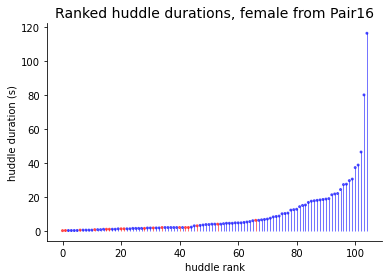

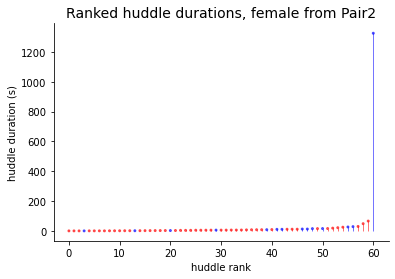

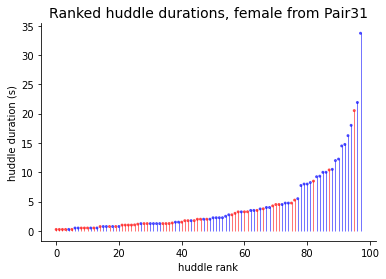

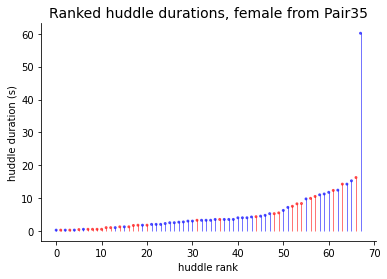

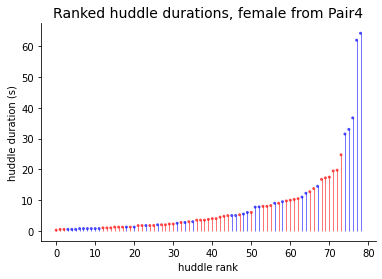

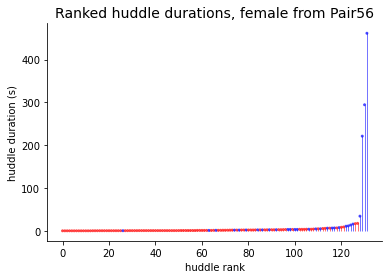

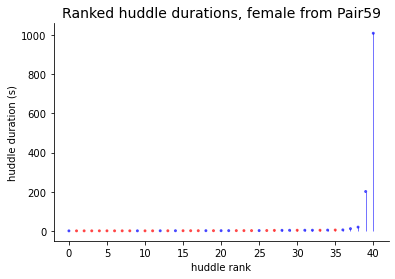

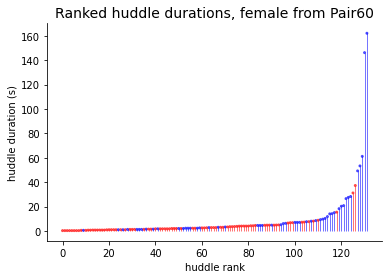

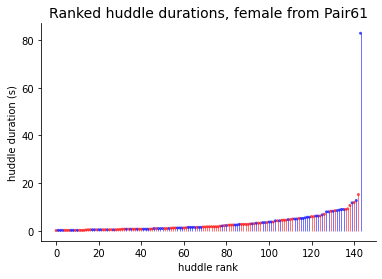

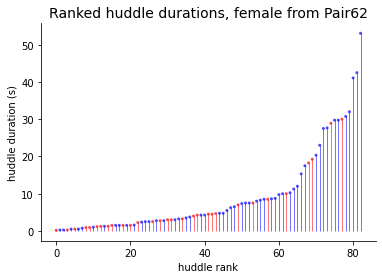

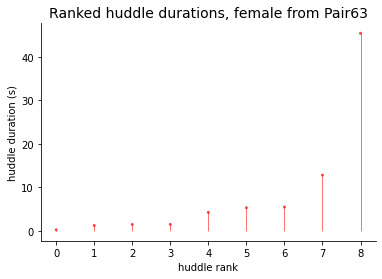

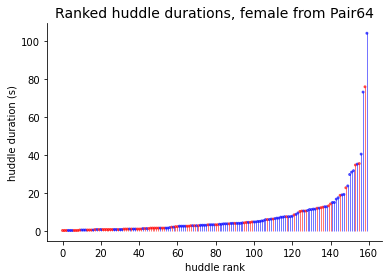

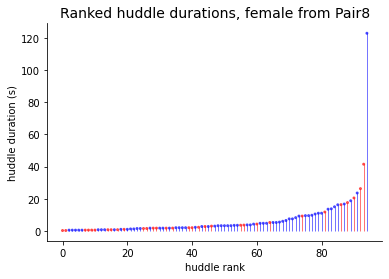

In [49]:
# ----- PUT ORDERED HUDDLE DURATION PLOTS INTO SEPARATE PLOTS PER PAIR, FEMALES -----

fdat = allfilt[allfilt.sex=='F']
nfpairs = len(np.unique(fdat.pair_tag))

for i,ptag in enumerate(np.unique(fdat.pair_tag)):
    thisdat = fdat[fdat.pair_tag==ptag]
    
    testdf = thisdat[thisdat.pair_tag==ptag]
    testdf.sort_values('duration', inplace=True)
    testdf.reset_index(inplace=True)
    testdf.color = 'r'
    testdf.color[testdf.assay=='reunion']='b'
    
    fig, ax = plt.subplots(figsize=(6,4),frameon=False)

    lines = ax.vlines(x=testdf.index, ymin=0, ymax=testdf.duration, color=testdf.color, alpha=0.6, linewidth=0.9)
    dots = ax.scatter(x=testdf.index, y=testdf.duration, s=4, color=testdf.color, alpha=0.6,label='_nolegend_')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylabel('huddle duration (s)')
    ax.set_xlabel('huddle rank')
    plt.title(f'Ranked huddle durations, female from {ptag}', fontsize=14)
    
    fname = f'ranked-huddle-durations_female_{ptag}.pdf'
    plt.savefig(os.path.join(outp,fname))

Text(0.5, 0.98, 'Ranked huddle durations, males')

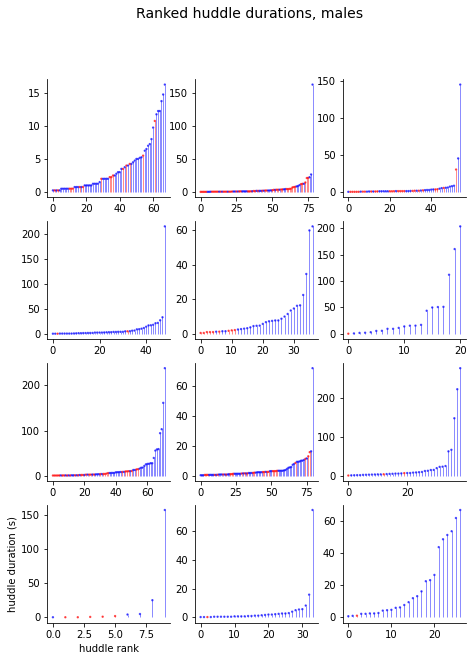

In [17]:
# ----- PUT ORDERED HUDDLE DURATION PLOTS INTO SUBPLOTS PER PAIR, MALES -----

dat = allfilt[allfilt.sex=='M']
npairs = len(np.unique(dat.pair_tag))
nc = 3
nr = int(np.ceil(npairs/nc))
fig, axs = plt.subplots(figsize=(7.5,10),nrows=nr,ncols=nc)

for i,ptag in enumerate(np.unique(dat.pair_tag)):
    
    ycoord = int(np.floor(i/nc))
    xcoord = i%nc
    
    thisdat = dat[dat.pair_tag==ptag]
    
    testdf = thisdat[thisdat.pair_tag==ptag]
    testdf.sort_values('duration', inplace=True)
    testdf.reset_index(inplace=True)
    testdf.color = 'r'
    testdf.color[testdf.assay=='reunion']='b'
    
    ax = axs[ycoord,xcoord]
    ax.vlines(x=testdf.index, ymin=0, ymax=testdf.duration, color=testdf.color, alpha=0.6, linewidth=0.75)
    ax.scatter(x=testdf.index, y=testdf.duration, s=2, color=testdf.color, alpha=0.6)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if np.logical_and(ycoord==nr-1,xcoord==0):
        ax.set_ylabel('huddle duration (s)')
        ax.set_xlabel('huddle rank')
        
fig.suptitle('Ranked huddle durations, males', fontsize=14)

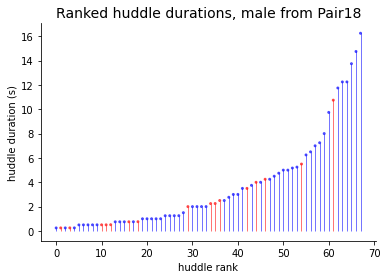

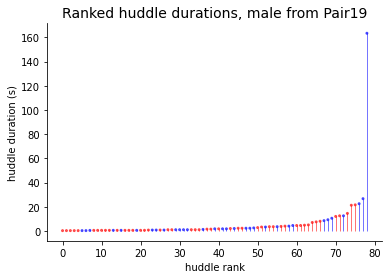

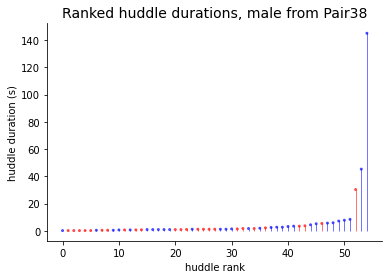

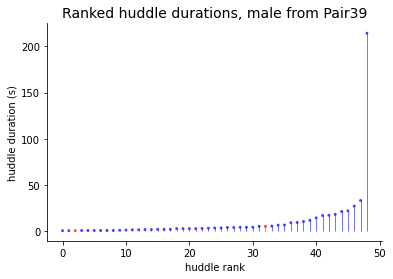

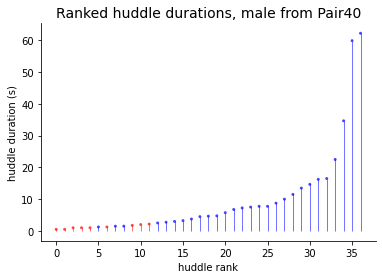

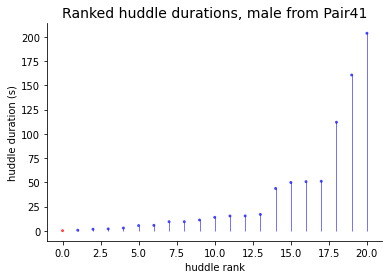

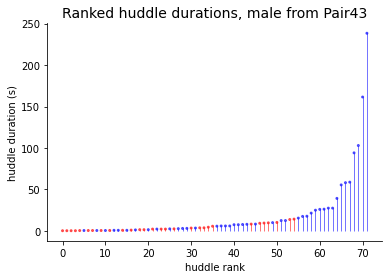

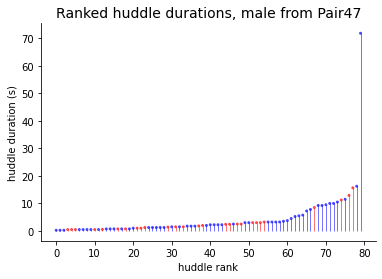

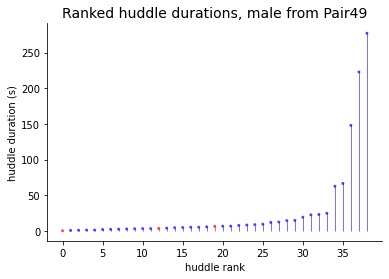

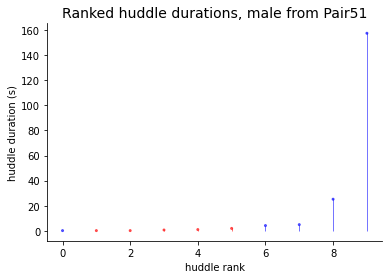

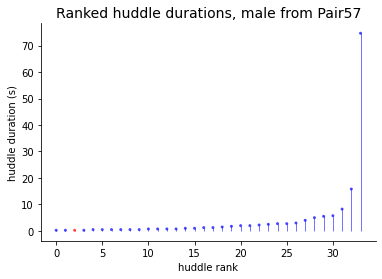

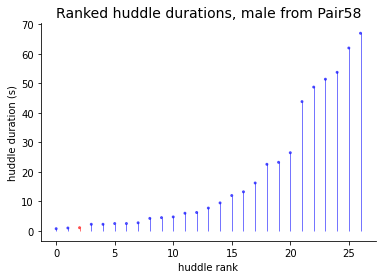

In [50]:
# ----- PUT ORDERED HUDDLE DURATION PLOTS INTO SEPARATE PLOTS PER PAIR, FEMALES -----

udat = allfilt[allfilt.sex=='M']
npairs = len(np.unique(udat.pair_tag))

for i,ptag in enumerate(np.unique(udat.pair_tag)):
    thisdat = udat[udat.pair_tag==ptag]
    
    testdf = thisdat[thisdat.pair_tag==ptag]
    testdf.sort_values('duration', inplace=True)
    testdf.reset_index(inplace=True)
    testdf.color = 'r'
    testdf.color[testdf.assay=='reunion']='b'
    
    fig, ax = plt.subplots(figsize=(6,4),frameon=False)

    lines = ax.vlines(x=testdf.index, ymin=0, ymax=testdf.duration, color=testdf.color, alpha=0.6, linewidth=0.9)
    dots = ax.scatter(x=testdf.index, y=testdf.duration, s=4, color=testdf.color, alpha=0.6,label='_nolegend_')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylabel('huddle duration (s)')
    ax.set_xlabel('huddle rank')
    plt.title(f'Ranked huddle durations, male from {ptag}', fontsize=14)
    
    fname = f'ranked-huddle-durations_male_{ptag}.pdf'
    plt.savefig(os.path.join(outp,fname))

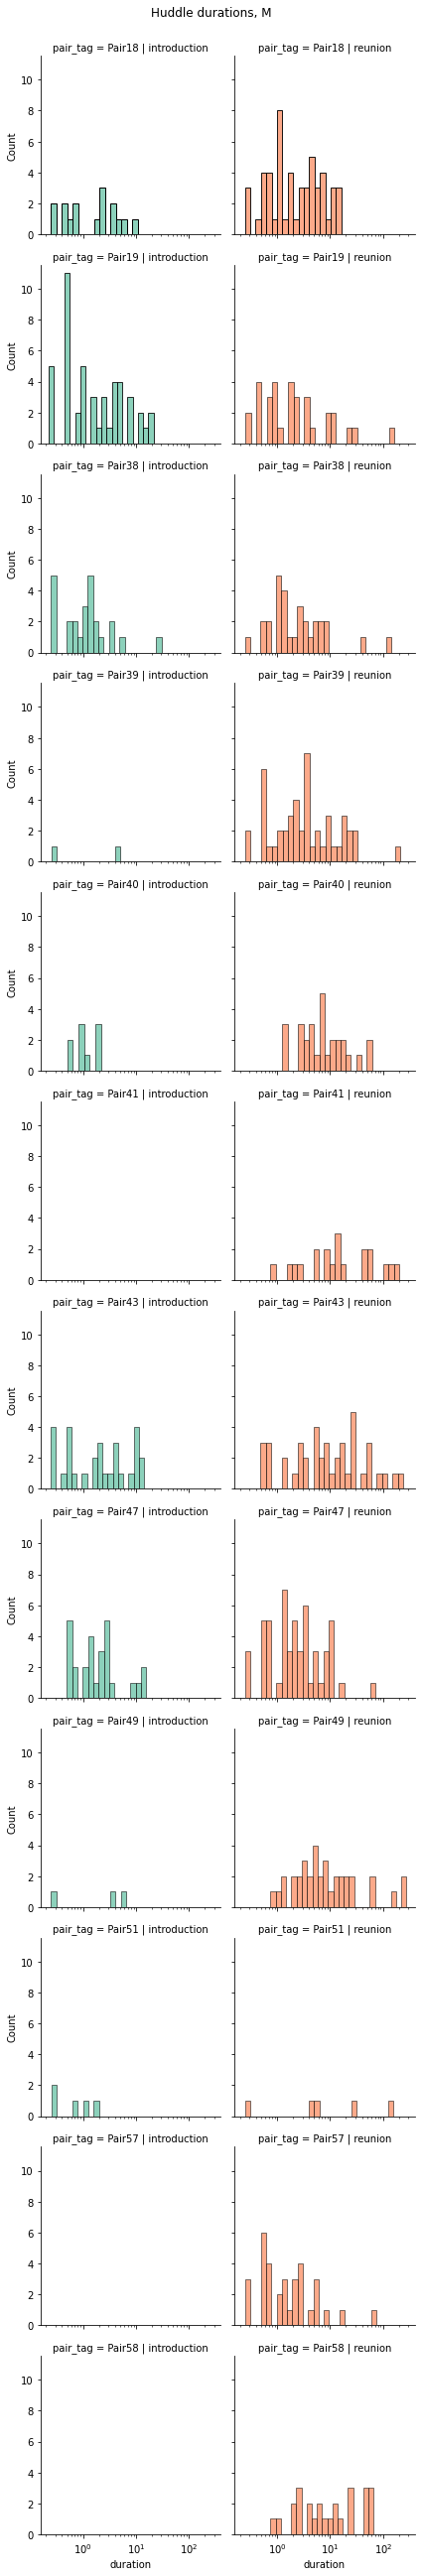

In [39]:
# ----- INDIVIDUAL DISTRIBUTIONS AND TOP QUARTILE ------

# plot intro and reunion distributions side by side per pair
# color top quartile huddles
sex = 'M'
tdat = allfilt[allfilt.sex==sex]
pal = 'Set2'
ho = ['introduction','reunion']
bw = 0.1
usestat='count'
tdat = tdat[tdat.duration!=0]
tdat = tdat[np.logical_not(np.logical_and(tdat.pair_tag=='Pair41',tdat.assay=='introduction'))]
tdat = tdat[np.logical_not(np.logical_and(tdat.pair_tag=='Pair57',tdat.assay=='introduction'))]
tdat = tdat[np.logical_not(np.logical_and(tdat.pair_tag=='Pair58',tdat.assay=='introduction'))]

npairs = len(np.unique(dat.pair_tag))
nc = 2
nr = npairs
# fig, axs = plt.subplots(figsize=(7.5,10),nrows=nr,ncols=nc)

g = sns.FacetGrid(tdat, row='pair_tag', col='assay',  hue='assay', hue_order=ho,palette=pal,col_order=ho)

g.map(sns.histplot,
             'duration',
             fill=True, 
             binwidth=bw,
             stat=usestat,
             element='bars',
             log_scale=(10,None),
             common_norm=False,)
g.set_titles(col_template="{col_name}")
g.fig.suptitle(f'Huddle durations, {sex}',y=1.0005)
plt.tight_layout()

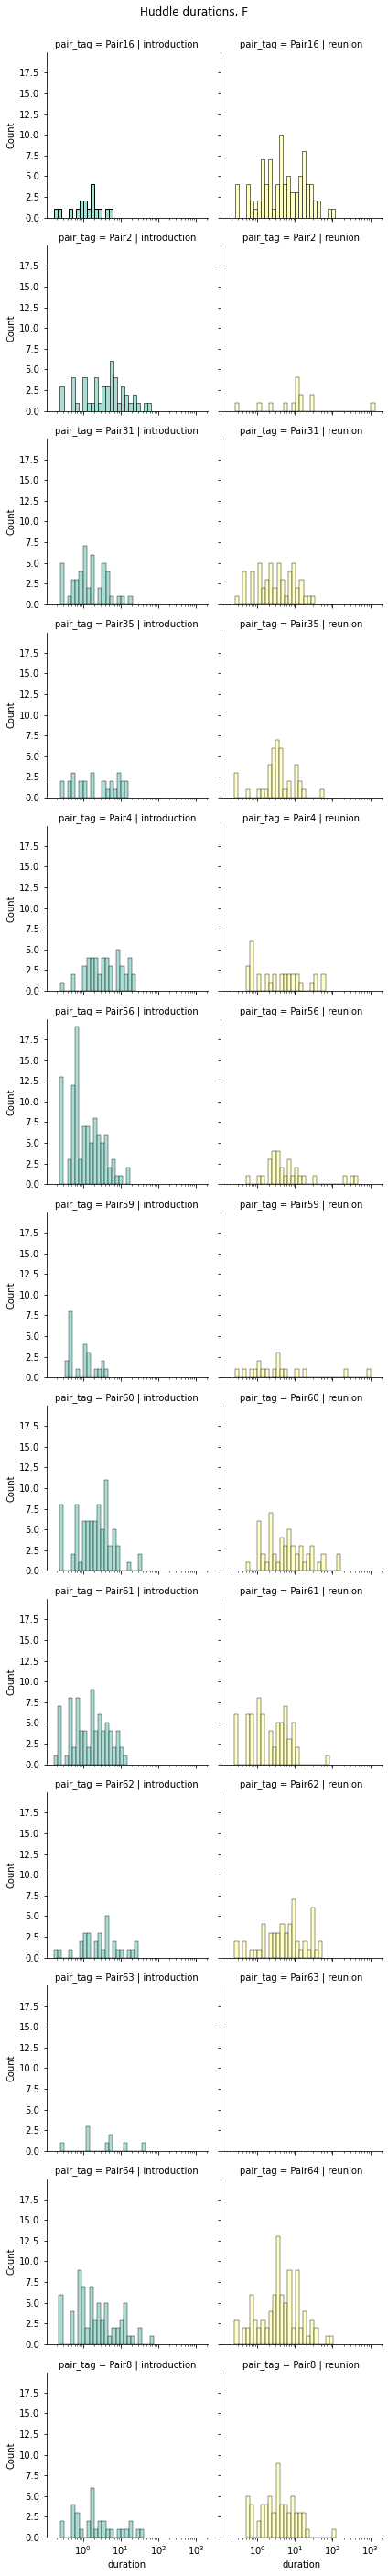

In [40]:
# ----- INDIVIDUAL DISTRIBUTIONS AND TOP QUARTILE ------

# plot intro and reunion distributions side by side per pair
# color top quartile huddles
sex = 'F'
tdat = allfilt[allfilt.sex==sex]
pal = 'Set3'
ho = ['introduction','reunion']
bw = 0.1
usestat='count'
tdat = tdat[tdat.duration!=0]

npairs = len(np.unique(dat.pair_tag))
nc = 2
nr = npairs
# fig, axs = plt.subplots(figsize=(7.5,10),nrows=nr,ncols=nc)

g = sns.FacetGrid(tdat, row='pair_tag', col='assay',  hue='assay', hue_order=ho,palette=pal,col_order=ho)

g.map(sns.histplot,
             'duration',
             fill=True, 
             binwidth=bw,
             stat=usestat,
             element='bars',
             log_scale=(10,None),
             common_norm=False,)
g.set_titles(col_template="{col_name}")
g.fig.suptitle(f'Huddle durations, {sex}',y=1.0005)
plt.tight_layout()

In [ ]:
# ----- PLOT HISTOGRAMS IN SUBPLOTS -----
# calculate and show top quartiles for assays with >4 huddles

Text(0.5, 17.200000000000003, 'huddle number')

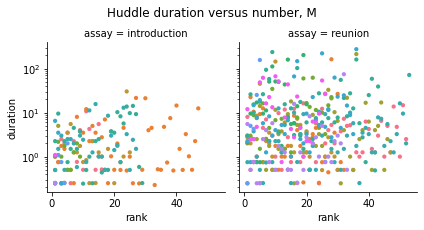

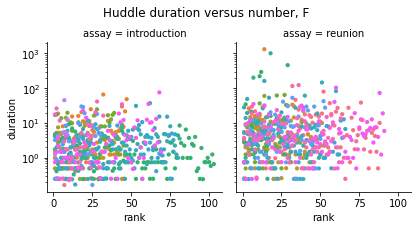

In [48]:
# ----- PLOT DURATION AGAINST NUMBER -----

sx = 'M'

# add time ranks per assay
allfilt['rank'] = allfilt.groupby(['pair_tag','assay'])['start_time'].rank()
allfilt['pair_categorical'] = allfilt.pair_num.astype('category')

y = sns.FacetGrid(allfilt[allfilt.sex==sx],col='assay',palette='Set1')
y.map_dataframe(sns.scatterplot,x="rank", y="duration",
                hue="pair_categorical", 
                linewidth=0,
                ax=ax,
                size=1,
               )
plt.yscale('log')
y.fig.suptitle(f'Huddle duration versus number, {sx}',y=1.05)
ax.set_xlabel('huddle number')

sx = 'F'

# add time ranks per assay
allfilt['rank'] = allfilt.groupby(['pair_tag','assay'])['start_time'].rank()
allfilt['pair_categorical'] = allfilt.pair_num.astype('category')

y = sns.FacetGrid(allfilt[allfilt.sex==sx],col='assay',palette='Set1')
y.map_dataframe(sns.scatterplot,x="rank", y="duration",
                hue="pair_categorical", 
                linewidth=0,
                ax=ax,
                size=1,
               )
plt.yscale('log')
y.fig.suptitle(f'Huddle duration versus number, {sx}',y=1.05)
ax.set_xlabel('huddle number')

Text(0.5, 17.200000000000003, 'huddle number')

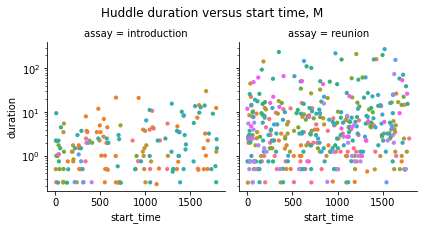

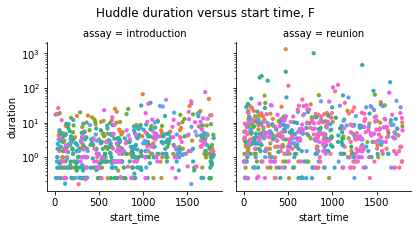

In [47]:
# ----- PLOT DURATION AGAINST START TIME -----

sx = 'M'

y = sns.FacetGrid(allfilt[allfilt.sex==sx],col='assay',palette='Set1')
y.map_dataframe(sns.scatterplot,x="start_time", y="duration",
                hue="pair_categorical", 
                linewidth=0,
                ax=ax,
                size=1,
               )
plt.yscale('log')
y.fig.suptitle(f'Huddle duration versus start time, {sx}',y=1.05)
ax.set_xlabel('huddle number')

sx = 'F'

# add time ranks per assay
allfilt['rank'] = allfilt.groupby(['pair_tag','assay'])['start_time'].rank()
allfilt['pair_categorical'] = allfilt.pair_num.astype('category')

y = sns.FacetGrid(allfilt[allfilt.sex==sx],col='assay',palette='Set1')
y.map_dataframe(sns.scatterplot,x="start_time", y="duration",
                hue="pair_categorical", 
                linewidth=0,
                ax=ax,
                size=1,
               )
plt.yscale('log')
y.fig.suptitle(f'Huddle duration versus start time, {sx}',y=1.05)
ax.set_xlabel('huddle number')

In [61]:
# ----- COMBINE TOP QUARTILE HUDDLES INTO GROUP DISTRIBUTIONS -----

# filter assays with fewer than 4 huddles
allfilt['huddle_count'] = allfilt.groupby(['pair_tag','sex','assay'])[['duration']].transform('count')
countfilt = allfilt[allfilt.huddle_count>3]

# add quantile assignments to each behavior
countfilt['quartile'] = countfilt.groupby(['pair_tag','assay'])['duration'].transform(lambda x: pd.qcut(x,4,labels=range(1,5)))

# filter to top quartile
tophuds = countfilt[countfilt.quartile==4]

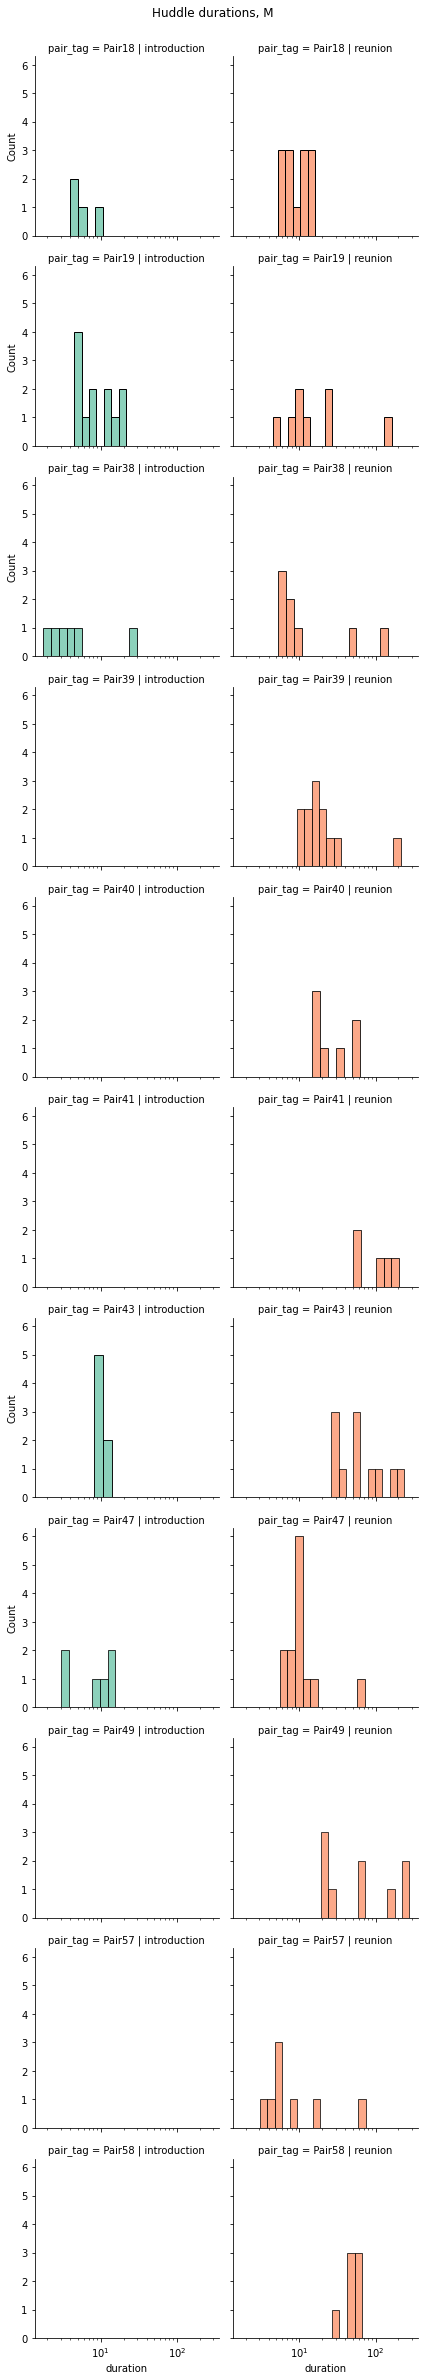

In [68]:
# ----- INDIVIDUAL DISTRIBUTIONS AND TOP QUARTILE ------

# plot intro and reunion distributions side by side per pair
# color top quartile huddles
sex = 'M'
tdat = tophuds[tophuds.sex==sex]
pal = 'Set2'
ho = ['introduction','reunion']
bw = 0.1
usestat='count'
tdat = tdat[tdat.duration!=0]
# tdat = tdat[np.logical_not(np.logical_and(tdat.pair_tag=='Pair41',tdat.assay=='introduction'))]
# tdat = tdat[np.logical_not(np.logical_and(tdat.pair_tag=='Pair57',tdat.assay=='introduction'))]
# tdat = tdat[np.logical_not(np.logical_and(tdat.pair_tag=='Pair58',tdat.assay=='introduction'))]
tdat = tdat[np.logical_not(np.logical_and(tdat.pair_tag=='Pair40',tdat.assay=='introduction'))]
tdat = tdat[np.logical_not(np.logical_and(tdat.pair_tag=='Pair51',tdat.assay=='introduction'))]
tdat = tdat[np.logical_not(np.logical_and(tdat.pair_tag=='Pair51',tdat.assay=='reunion'))]


npairs = len(np.unique(tdat.pair_tag))
nc = 2
nr = npairs
# fig, axs = plt.subplots(figsize=(7.5,10),nrows=nr,ncols=nc)

g = sns.FacetGrid(tdat, row='pair_tag', col='assay',  hue='assay', hue_order=ho,palette=pal,col_order=ho)

g.map(sns.histplot,
             'duration',
             fill=True, 
             binwidth=bw,
             stat=usestat,
             element='bars',
             log_scale=(10,None),
             common_norm=False,)
g.set_titles(col_template="{col_name}")
g.fig.suptitle(f'Huddle durations, {sex}',y=1.0005)
plt.tight_layout()

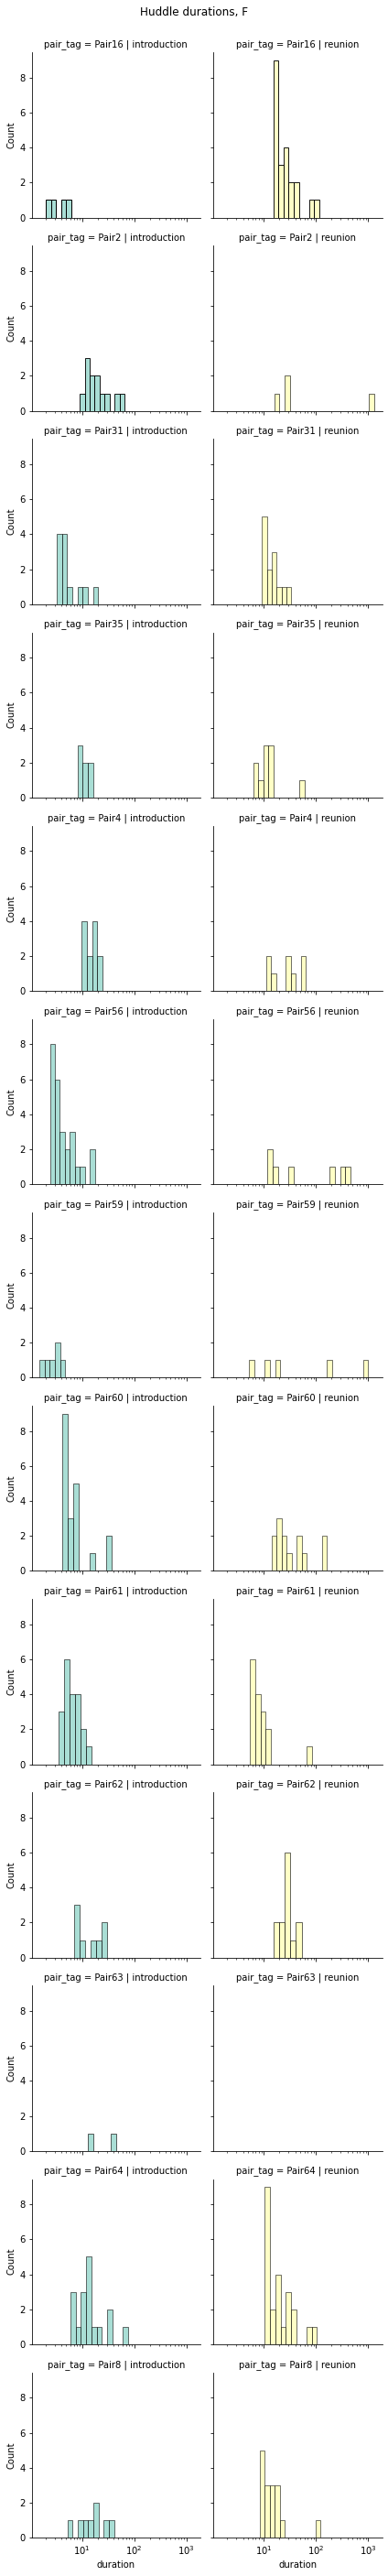

In [69]:
# ----- INDIVIDUAL DISTRIBUTIONS AND TOP QUARTILE ------

# plot intro and reunion distributions side by side per pair
# color top quartile huddles
sex = 'F'
tdat = tophuds[tophuds.sex==sex]
pal = 'Set3'
ho = ['introduction','reunion']
bw = 0.1
usestat='count'
tdat = tdat[tdat.duration!=0]

npairs = len(np.unique(tdat.pair_tag))
nc = 2
nr = npairs
# fig, axs = plt.subplots(figsize=(7.5,10),nrows=nr,ncols=nc)

g = sns.FacetGrid(tdat, row='pair_tag', col='assay',  hue='assay', hue_order=ho,palette=pal,col_order=ho)

g.map(sns.histplot,
             'duration',
             fill=True, 
             binwidth=bw,
             stat=usestat,
             element='bars',
             log_scale=(10,None),
             common_norm=False,)
g.set_titles(col_template="{col_name}")
g.fig.suptitle(f'Huddle durations, {sex}',y=1.0005)
plt.tight_layout()

Text(0.5, 0.98, 'Huddle duration, top quartile from each individual')

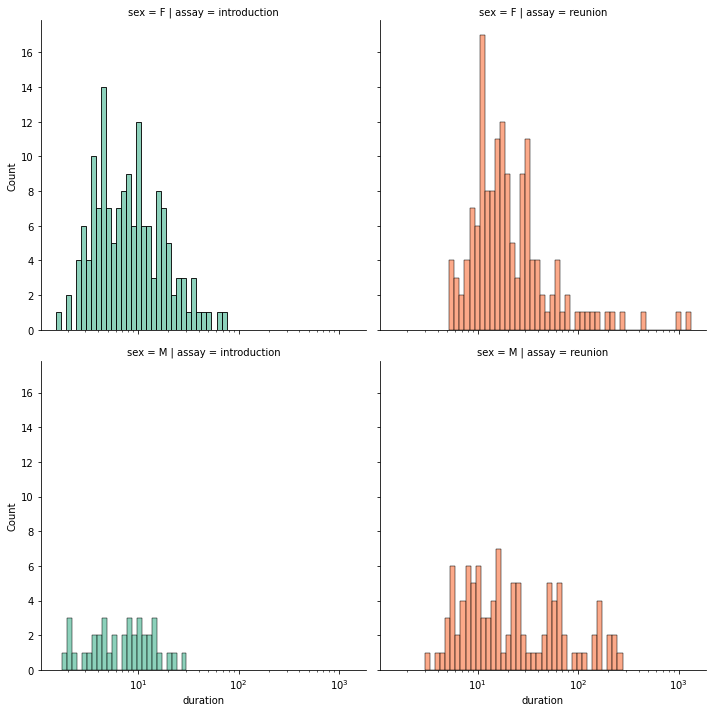

In [73]:
z = sns.FacetGrid(tophuds,col='assay',row='sex',hue='assay',palette='Set2',height=5)
z.map_dataframe(sns.histplot,x='duration',binwidth=0.05,log_scale=(10,False))
x.fig.subplots_adjust(top=.8)
x.fig.suptitle('Huddle duration, top quartile from each individual')

In [72]:
bw

0.1

In [1]:
data.head()

NameError: name 'data' is not defined